In [55]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA

In [56]:
#Reading dataset from csv file.
data=pd.read_csv("Desktop/eda/Diabetes/Diabetes/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
# Gathering more information about dataset. 
print(data.shape)
print(data.columns)
print(data.info())
data.describe()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [60]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.30,random_state=150)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [63]:
dtc = DecisionTreeClassifier()
print(dtc.fit(X_train,y_train))
print(dtc.score(X_test,y_test))

DecisionTreeClassifier()
0.7229437229437229


In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.7575757575757576

In [65]:
y_pred=dtc.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [66]:
Accuracy_score=accuracy_score(y_test,y_pred)
Accuracy_score

0.7229437229437229

In [67]:
Conf_m=confusion_matrix(y_test,y_pred)
Conf_m

array([[118,  34],
       [ 30,  49]], dtype=int64)

In [68]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       148
           1       0.62      0.59      0.60        83

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231



In [69]:
#For hyper tunning

In [70]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X)
X_new

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.30,random_state=250)

In [72]:
pca=PCA()

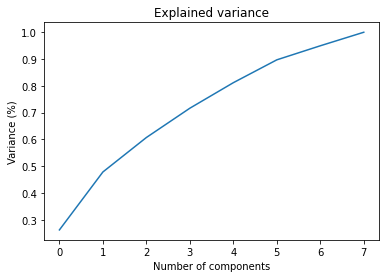

In [73]:
principl_component=pca.fit_transform(X_new)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance (%)")
plt.title("Explained variance")
plt.show()

In [74]:
pca=PCA(n_components=5)
new_data=pca.fit_transform(X_new)
principal=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])
principal

,PC-1,PC-2,PC-3,PC-4,PC-5
0,1.068503,1.234895,0.095930,0.496990,-0.109985
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507
2,-0.396477,1.595876,1.760678,-0.070395,0.906474
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060
4,2.359334,-2.184819,2.963107,4.033099,0.592684
...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009
766,-1.060324,0.837062,0.425030,-0.204493,0.957593


In [75]:
X_train,X_test,y_train,y_test=train_test_split(principal,y,test_size=.30,random_state=150)

In [76]:
dtc=DecisionTreeClassifier()

In [77]:
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.48917748917748916

In [78]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth':range(1,32,2),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [79]:
grid_search=GridSearchCV(estimator=dtc,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [80]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(1, 32, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [81]:
best_parameters=grid_search.best_params_
print(best_parameters)
grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'random'}


0.7598823122187608

In [100]:
# Applying best parameter in decision tree
dtc2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 50, min_samples_leaf= 5, min_samples_split= 3, splitter= 'random')
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       min_samples_split=3, splitter='random')

In [101]:
dtc2.score(X_test,y_test)

0.7575757575757576